### Дополнительное домашнее задание

*(для желающих, чисто на интерес)*

1. Выбрать пользователя ВКонтакте. Лучше выбирать пользователя с не очень большим числом друзей и не очень маленьким (больше 100 уже будет тяжеловато, для удобства можно будет потом укоротить список друзей для упрощения задачи).
2. Используя API ВКонтакте и соответствующую библиотеку Python, выгрузить имена и фамилии друзей этого пользователя.
3. Для каждого друга пользователя, найденного на шаге 2, выгрузить имена и фамилии его друзей.
4. На основе выгруженных данных (возможно, здесь будет удобно создать массив или вложенный список, где каждый список внутри содержит перечень друзей одного пользователя) построить граф друзей. 

Чтобы построить граф друзей, нужно: 

* получить матрицу смежности для описания графа;
* установить библиотеку Networkx (`!pip install networkx`);
* используя функционал библиотек Networkx и Matplotlib, по матрице смежности нарисовать граф друзей.

### Пояснения, необходимые для выполнения задания

**Граф** – совокупность множества вершин (точек) и множества ребер (линий между ними). 

Отношения между людьми можно представить в виде графа, *вершинами* которого являются люди, а *ребрами* – связи между ними. Если отношения между людьми симметричные (Вася считает Петю другом, и Петя считает Васю другом), то их можно представить в виде **неориентированного графа**:

![](https://raw.githubusercontent.com/allatambov/R-programming-4/master/homeworks/hw1/figs/README-unnamed-chunk-14-1.png)

Если отношения между людьми несимметричные (Петя считает Васю другом, а Вася не считает Петю другом), то их можно представить в виде **ориентированного графа**:

![](https://raw.githubusercontent.com/allatambov/R-programming-4/master/homeworks/hw1/figs/README-unnamed-chunk-15-1.png)

Нас будут интересовать ориентированные графы, то есть несимметричные отношения между людьми.

**Матрица смежности** ориентированного графа $G$ (*adjacency matrix*) – квадратная матрица $A$ размера $n \times n$, где $n$ - число вершин графа $G$ с элементами такого вида:

$$
a_{ij} = \begin{cases} 
1, \text{если из вершины } i \text{ идет дуга в вершину } j \\ 
0, иначе\end{cases}
$$ 

Матрица смежности ориентированного графа не должна быть симметричной. Кроме того, матрицы смежности в анализе социальных сетей имеют еще одну особенность – на главной диагонали обычно стоят нули, так как человек не считается другом самому себе (вообще матрицы смежности могут быть любыми, так как в графах возможны петли – связи вершины самой с собой).

**Пример.**

Есть пять друзей, обозначим их A, B, C, D, E. Известно, что 

* A дружит с C
* B дружит с C, D, E 
* C дружит с A, B
* D дружит с B, E
* E дружит с B, D.

Построим матрицу смежности размерности $5\times 5$, так как друзей пятеро.

In [1]:
import numpy as np
A = np.matrix([[0, 0, 1, 0, 0], 
               [0, 0, 1, 1, 1],
               [1, 1, 0, 0, 0],
               [0, 1, 0, 0, 1],
               [0, 1, 0, 1, 0]]) 

Теперь импортируем необходимые для построения графа библиотеки:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Создаем граф G:

In [3]:
G = nx.from_numpy_matrix(A)
G

Строим его:

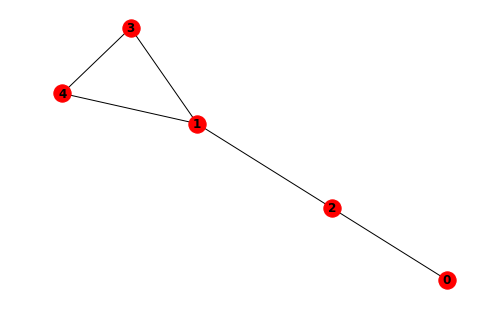

In [4]:
# with_labels – чтобы вершины были подписаны
# font_weight – чтобы шрифт в подписях был полужирным

nx.draw(G, with_labels=True, font_weight='bold')

Если хотим изменить подписи к вершинам, то придется создать словарь с соответствиями текущих меток (числа от 0 до 4) и новых. Удобнее всего это сделать с помощью `zip()`:

In [7]:
new = ['A', 'B', 'C', 'D', 'E']
old = range(0, 5)

new_labels = dict(zip(old, new))
new_labels

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

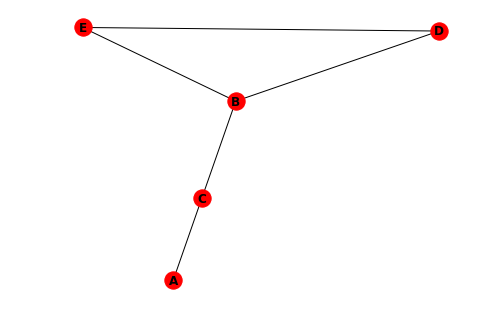

In [8]:
nx.draw(G, with_labels=True, font_weight='bold',
       labels = new_labels)

Граф друзей готов!

Если хочется настроить другие параметры у графа (цвет, размер или форму вершин, цвет и начертание шрифта и прочее), можно обратиться к [документации](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx).

P.S. Как можно догадаться, главная загвоздка задания – сформировать матрицу смежности на основе выгруженных данных по каждому другу пользователя.